<a href="https://colab.research.google.com/github/lilia-sanchez/LILY-SANCHEZ/blob/main/LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECG data handling

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#### Import data

In [2]:
data = pd.read_csv (r'./lily_Export.txt', sep = '\t')
data

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
1076,10.76,-0.058107
1077,10.77,-0.013356
1078,10.78,-0.036241
1079,10.79,-0.011665


#### Visualize data

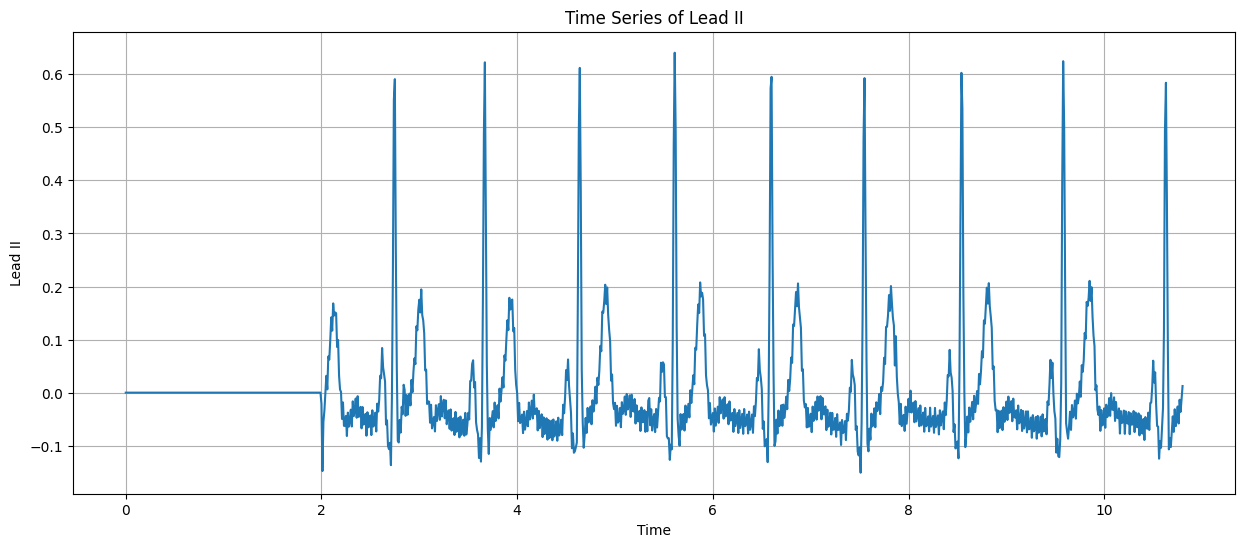

In [3]:
df = pd.DataFrame(data)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

#### Find the R waves

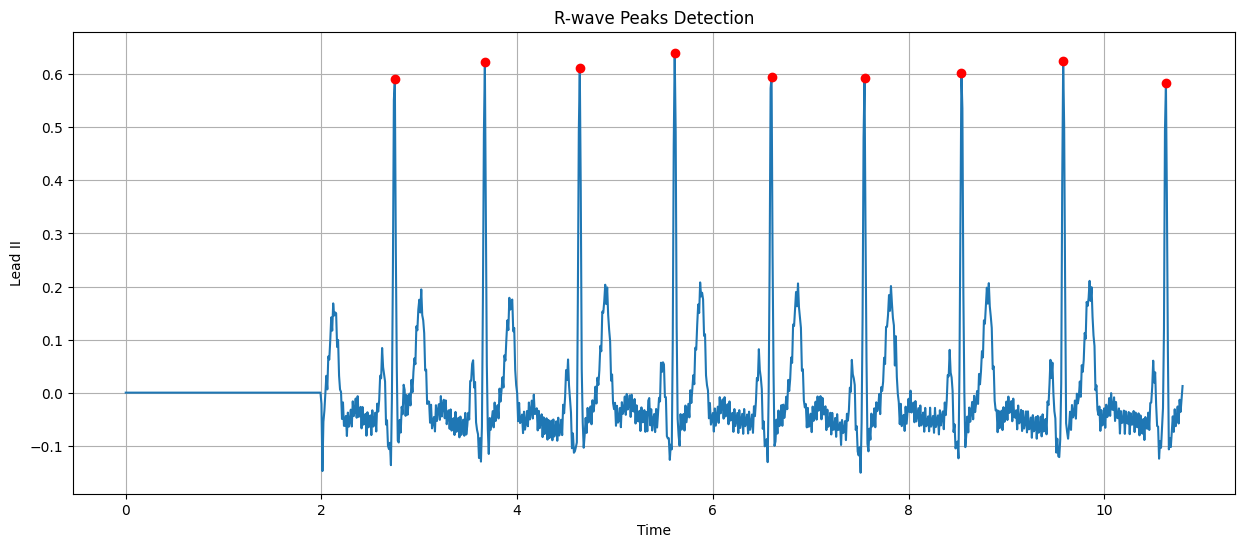

In [4]:
# Detect R-wave peaks
peak_indices, _ = find_peaks(df['Lead II'], height=.3)  # You might need to adjust parameters like distance, height, etc.
# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.plot(df['Time'].iloc[peak_indices], df['Lead II'].iloc[peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()


## Determine HR

In [5]:
# Calculate RR intervals
rr_intervals = df['Time'].iloc[peak_indices].diff().dropna().values

# Calculate heart rate in BPM
average_rr_interval = rr_intervals.mean()
heart_rate = 60 / average_rr_interval

print(f"Average RR interval: {average_rr_interval:.2f} seconds")
print(f"Heart rate: {heart_rate:.2f} BPM")


Average RR interval: 0.99 seconds
Heart rate: 60.91 BPM


## Label P, R, and T waves

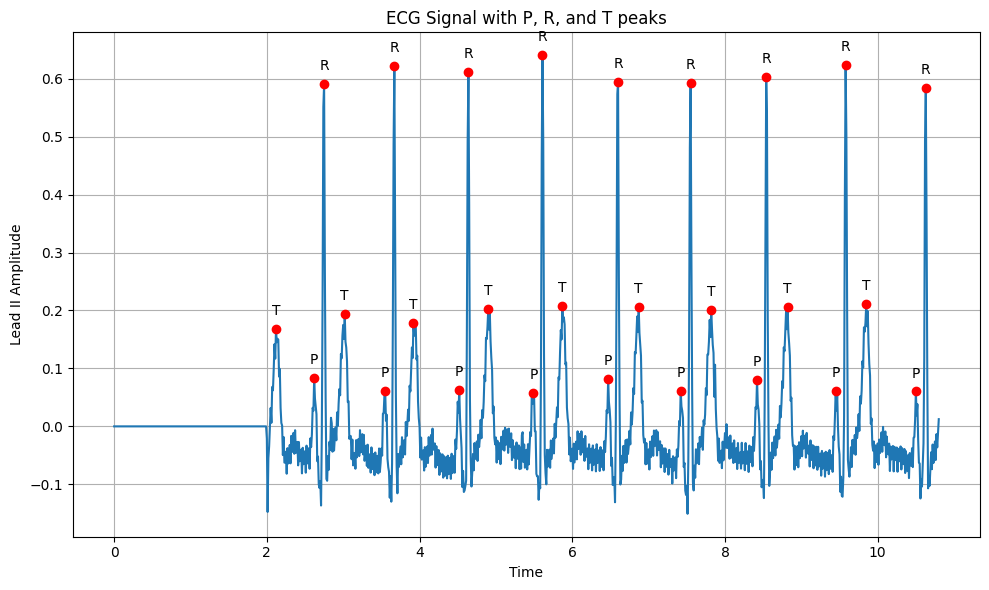

In [6]:
# Detect all peaks without amplitude restriction
peaks, _ = find_peaks(df['Lead II'], distance=10, height=0.05) #Distance and height will need to change depending upon your data

# Classify peaks based on their amplitude
def classify_peak(amp):
    if amp > 0.3: #This height will depend on your data
        return 'R'
    elif 0.1 <= amp <= 0.3: #This height will depend on your data
        return 'T'
    else:
        return 'P'

labels = [classify_peak(df['Lead II'][peak]) for peak in peaks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks')
plt.grid(True)
plt.tight_layout()
plt.show()

## View a specific time window

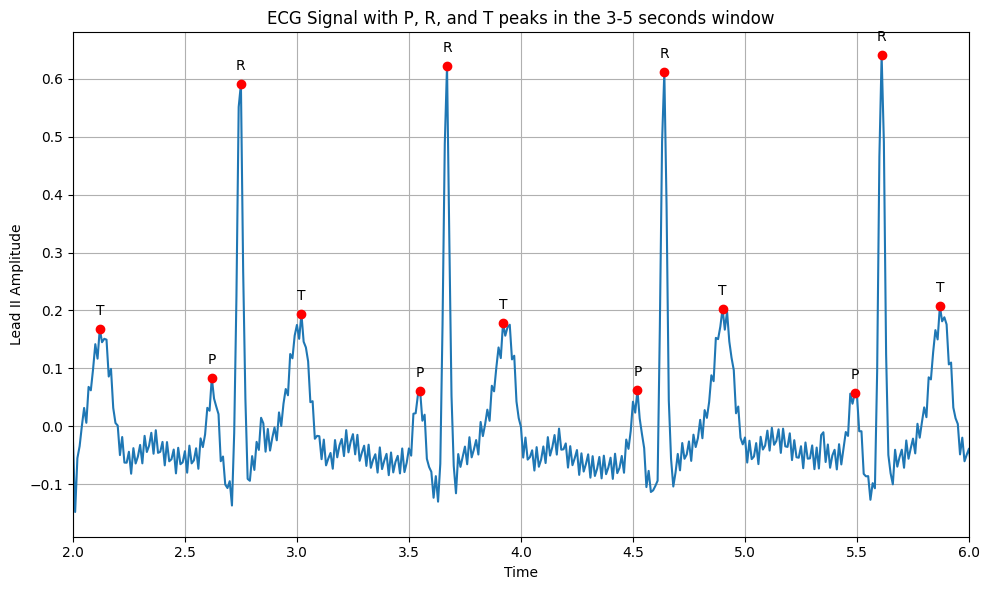

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks in the 3-5 seconds window')
plt.grid(True)

# Set x-axis limits to zoom into the 3-5 seconds time window
plt.xlim(2, 6)

plt.tight_layout()
plt.show()